# Лабораторная работа №25 Кластеризация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:\\Магистратура\\3\\Машинное обучение\\healthcare-dataset-stroke-data.csv', sep=',')
print(df.info(), "\n")
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None 



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
# Внесение недостающих значений

med = df['bmi'].median()
print(med)
df_med = df
df_med['bmi'] = df_med['bmi'].fillna(med)


28.1


In [4]:
from sklearn.preprocessing import OrdinalEncoder

education_column = df[["work_type"]]
print(df['work_type'].unique()) #посмотрим какие виды образования присутствуют в выборке
encoder = OrdinalEncoder() # вызываем кодировщик
encoder = encoder.fit(df[['work_type']])
df['work_type'] = encoder.transform(df[['work_type']])
df

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,2.0,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,3.0,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,2.0,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,2.0,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,3.0,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,2.0,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,3.0,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,3.0,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,2.0,Rural,166.29,25.6,formerly smoked,0


In [5]:
education_column = df[["gender"]]
print(df['gender'].unique()) #посмотрим какие виды образования присутствуют в выборке
encoder = OrdinalEncoder() # вызываем кодировщик
encoder = encoder.fit(df[['gender']])
df['gender'] = encoder.transform(df[['gender']])
df

['Male' 'Female' 'Other']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,Yes,2.0,Urban,228.69,36.6,formerly smoked,1
1,51676,0.0,61.0,0,0,Yes,3.0,Rural,202.21,28.1,never smoked,1
2,31112,1.0,80.0,0,1,Yes,2.0,Rural,105.92,32.5,never smoked,1
3,60182,0.0,49.0,0,0,Yes,2.0,Urban,171.23,34.4,smokes,1
4,1665,0.0,79.0,1,0,Yes,3.0,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0.0,80.0,1,0,Yes,2.0,Urban,83.75,28.1,never smoked,0
5106,44873,0.0,81.0,0,0,Yes,3.0,Urban,125.20,40.0,never smoked,0
5107,19723,0.0,35.0,0,0,Yes,3.0,Rural,82.99,30.6,never smoked,0
5108,37544,1.0,51.0,0,0,Yes,2.0,Rural,166.29,25.6,formerly smoked,0


In [6]:
education_column = df[["ever_married"]]
print(df['ever_married'].unique()) #посмотрим какие виды образования присутствуют в выборке
encoder = OrdinalEncoder() # вызываем кодировщик
encoder = encoder.fit(df[['ever_married']])
df['ever_married'] = encoder.transform(df[['ever_married']])
df

['Yes' 'No']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,1.0,2.0,Urban,228.69,36.6,formerly smoked,1
1,51676,0.0,61.0,0,0,1.0,3.0,Rural,202.21,28.1,never smoked,1
2,31112,1.0,80.0,0,1,1.0,2.0,Rural,105.92,32.5,never smoked,1
3,60182,0.0,49.0,0,0,1.0,2.0,Urban,171.23,34.4,smokes,1
4,1665,0.0,79.0,1,0,1.0,3.0,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0.0,80.0,1,0,1.0,2.0,Urban,83.75,28.1,never smoked,0
5106,44873,0.0,81.0,0,0,1.0,3.0,Urban,125.20,40.0,never smoked,0
5107,19723,0.0,35.0,0,0,1.0,3.0,Rural,82.99,30.6,never smoked,0
5108,37544,1.0,51.0,0,0,1.0,2.0,Rural,166.29,25.6,formerly smoked,0


In [7]:
education_column = df[["Residence_type"]]
print(df['Residence_type'].unique()) #посмотрим какие виды образования присутствуют в выборке
encoder = OrdinalEncoder() # вызываем кодировщик
encoder = encoder.fit(df[['Residence_type']])
df['Residence_type'] = encoder.transform(df[['Residence_type']])
df

['Urban' 'Rural']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,formerly smoked,1
1,51676,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.1,never smoked,1
2,31112,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,never smoked,1
3,60182,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,smokes,1
4,1665,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0.0,80.0,1,0,1.0,2.0,1.0,83.75,28.1,never smoked,0
5106,44873,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.0,never smoked,0
5107,19723,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.6,never smoked,0
5108,37544,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.6,formerly smoked,0


In [9]:
education_column = df[["smoking_status"]]
print(df['smoking_status'].unique()) #посмотрим какие виды образования присутствуют в выборке
encoder = OrdinalEncoder() # вызываем кодировщик
encoder = encoder.fit(df[['smoking_status']])
df['smoking_status'] = encoder.transform(df[['smoking_status']])
df

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
1,51676,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.1,2.0,1
2,31112,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,60182,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,1665,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0.0,80.0,1,0,1.0,2.0,1.0,83.75,28.1,2.0,0
5106,44873,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.0,2.0,0
5107,19723,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.6,2.0,0
5108,37544,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.6,1.0,0


In [10]:
df.drop(columns=['id'],inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.1,2.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1.0,2.0,1.0,83.75,28.1,2.0,0
5106,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.0,2.0,0
5107,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.6,2.0,0
5108,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.6,1.0,0


In [15]:
df.iloc[:,:10]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.1,2.0
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0
...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1.0,2.0,1.0,83.75,28.1,2.0
5106,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.0,2.0
5107,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.6,2.0
5108,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.6,1.0


In [16]:
X = np.array(df.iloc[:,:10])
y = np.array(df.iloc[:,10])
X

array([[  1.  ,  67.  ,   0.  , ..., 228.69,  36.6 ,   1.  ],
       [  0.  ,  61.  ,   0.  , ..., 202.21,  28.1 ,   2.  ],
       [  1.  ,  80.  ,   0.  , ..., 105.92,  32.5 ,   2.  ],
       ...,
       [  0.  ,  35.  ,   0.  , ...,  82.99,  30.6 ,   2.  ],
       [  1.  ,  51.  ,   0.  , ..., 166.29,  25.6 ,   1.  ],
       [  0.  ,  44.  ,   0.  , ...,  85.28,  26.2 ,   0.  ]])

In [17]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [38]:
from sklearn.cluster import KMeans

# настройка K-Means
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 40)
# Вычислить центры кластеров и спрогнозировать индекс кластера для каждой выборки.
y_kmeans = kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
# центры кластеров
print(kmeans.cluster_centers_)

[[4.08910891e-01 2.02759802e+01 1.38613861e-02 1.48514851e-03
  2.87623762e-01 2.55693069e+00 5.02970297e-01 9.11191584e+01
  2.58654455e+01 1.10445545e+00]
 [4.70668486e-01 5.82981173e+01 2.42837653e-01 1.43246930e-01
  8.66302865e-01 1.97271487e+00 5.12960437e-01 2.03577804e+02
  3.23556617e+01 1.55798090e+00]
 [4.01357658e-01 5.82087399e+01 1.23886296e-01 7.12770471e-02
  9.06661010e-01 1.89478150e+00 5.10818838e-01 8.87277896e+01
  3.03436996e+01 1.55409419e+00]]


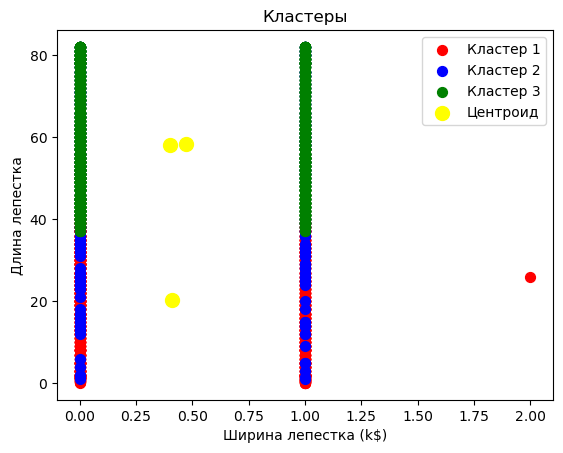

In [39]:
# визуализация кластеров
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Кластер 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Кластер 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Кластер 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label ='Центроид')
plt.title('Кластеры')
plt.xlabel('Ширина лепестка (k$)')
plt.ylabel('Длина лепестка')
plt.legend(loc='best')
plt.show()

In [26]:
kl=kmeans.labels_.reshape(-1,1)
y_new=y.reshape(-1, 1)
z=np.hstack((X, y_new, kl))
z=pd.DataFrame(z,columns=['gender',
                       'age',
                       'hypertension',
                       'heart_disease',
                       'ever_married',
                       'work_type',
                       'Residence_type',
                       'avg_glucose_level',
                       'bmi',
                       'smoking_status',
                       'stroke',
                       'claster'])
z

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,claster
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,36.6,1.0,1.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,28.1,2.0,1.0,1.0
2,1.0,80.0,0.0,1.0,1.0,2.0,0.0,105.92,32.5,2.0,1.0,2.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.4,3.0,1.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1.0,0.0,1.0,2.0,1.0,83.75,28.1,2.0,0.0,2.0
5106,0.0,81.0,0.0,0.0,1.0,3.0,1.0,125.20,40.0,2.0,0.0,2.0
5107,0.0,35.0,0.0,0.0,1.0,3.0,0.0,82.99,30.6,2.0,0.0,0.0
5108,1.0,51.0,0.0,0.0,1.0,2.0,0.0,166.29,25.6,1.0,0.0,1.0


## Расчет метрик

In [27]:
# функция для расчета метрик
def bench_k_means(estimator, name, data):
    # принимает кластеризатор, его название, данные
    t0 = time() # старт таймера
    estimator.fit(data) # обучаем кластеризатор
    # вычисляем метрики и отображаем их
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [31]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from time import time

data = scale(X) # предобработка, масштабируем данные, приводя к нулевому среднему и единичной дисперсии

n_samples, n_features = data.shape # число примеров и число признаков
n_digits = len(np.unique(y)) # число уникальных классов
labels = y

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

# заголовок для таблички результатов
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
# тест для k-means в котором используется улучшенный выбор начальной расстановки центроидов
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)
# тест для k-means  в котором центроиды изначально выбраны случайно из данных
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# тест для k-means  в котором начальные центроиды выбраны как главные компоненты PCA
pca = PCA(n_components=n_digits).fit(data) # вычисляем главные компоненты
bench_k_means(KMeans(init=pca.components_, # используем главные компоненты как начальные положения центроидов
                     n_clusters=n_digits, n_init=1), # здесь начальные положения центроидов не изменяются, поэтому только 1 раз делаем кластеризацию
              name="PCA-based",
              data=data)
print(82 * '_')

n_digits: 2, 	 n_samples 5110, 	 n_features 10
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.14s	41205	0.075	0.024	0.036	-0.042	0.036	0.204
random   	0.13s	41205	0.075	0.024	0.036	-0.042	0.036	0.189
PCA-based	0.01s	41205	0.075	0.024	0.036	-0.042	0.036	0.176
__________________________________________________________________________________


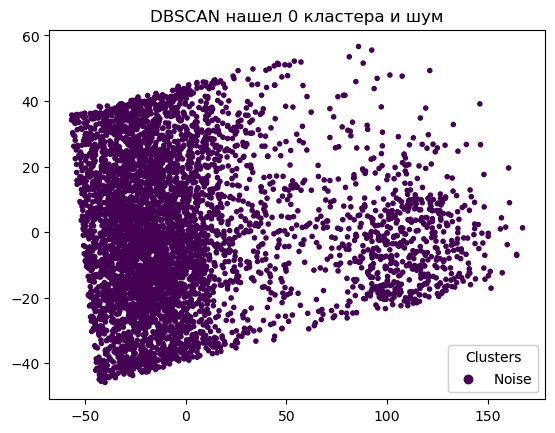

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN # DBSCAN
from sklearn.decomposition import PCA
import numpy as np

# Создаем кластеризатор
dbscan = DBSCAN()
# Обучаем его (выполняем кластеризацию)
dbscan.fit(X)
# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
N_cluster=dbscan.labels_.max()+1 # число найденных кластеров
if_noise=np.count_nonzero(dbscan.labels_==-1) # был ли найден шум (класс с меткой "-1")
fig, ax = plt.subplots()

# Рисуем в соответствии с найденными кластерами
scatter=ax.scatter(pca_2d[:, 0], pca_2d[:, 1],
 c=dbscan.labels_, # метка кластера - цвет
 marker='.')
# подпишем легенду
handles,labels=scatter.legend_elements() # указатели и подписи легенды
if if_noise: # если найден шум
    labels[0]='$\\mathdefault{Noise}$' # первую подпись заменим (а она именно первая, поскольку упорядочены по возрастанию и шуму соответствует -1 )

legend1 = ax.legend(handles=handles, labels=labels, loc="lower right", title="Clusters")
ax.add_artist(legend1)
if if_noise: # если найден шум
    plt.title('DBSCAN нашел {:} кластера и шум'.format(N_cluster))
else: # если не было шума
    plt.title('DBSCAN нашел {:} кластера без шума'.format(N_cluster))

plt.show()
